<a href="https://colab.research.google.com/github/Rahman17309/ASSIGNMENT1/blob/main/Logistic_Regression_Bank_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression Bank Data set

In [31]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv("/content/bank-full.csv", sep=";")

In [33]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


##EDA

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [35]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Knowing the categorical variables for columns ('job', 'marital', 'education', 'contact', 'poutcome')

In [36]:
from tabulate import tabulate
data = {
    'Variable': ['job', 'marital', 'education', 'contact', 'poutcome'],
    'Unique Values': [
        ', '.join(df['job'].unique()),
        ', '.join(df['marital'].unique()),
        ', '.join(df['education'].unique()),
        ', '.join(df['contact'].unique()),
        ', '.join(df['poutcome'].unique())]}
print(tabulate(data, headers='keys', tablefmt='grid'))

+------------+--------------------------------------------------------------------------------------------------------------------------------------+
| Variable   | Unique Values                                                                                                                        |
+============+======================================================================================================================================+
| job        | management, technician, entrepreneur, blue-collar, unknown, retired, admin., services, self-employed, unemployed, housemaid, student |
+------------+--------------------------------------------------------------------------------------------------------------------------------------+
| marital    | married, single, divorced                                                                                                            |
+------------+--------------------------------------------------------------------------------------

Doing One-Hot Encoding of categrical variables

In [37]:
df1=pd.get_dummies(df,columns=['job','marital','education','contact','poutcome'])

In [38]:
pd.set_option("display.max.columns", None)
df1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   month                45211 non-null  object
 7   duration             45211 non-null  int64 
 8   campaign             45211 non-null  int64 
 9   pdays                45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  y                    45211 non-null  object
 12  job_admin.           45211 non-null  uint8 
 13  job_blue-collar      45211 non-null  uint8 
 14  job_entrepreneur     45211 non-null  uint8 
 15  job_housemaid        45211 non-null  uint8 
 16  job_

Custom Binary Encoding of Binary Output variables for columns ('default' ,'housing' ,'loan' ,'y')

In [40]:
df1['default'] = np.where(df1['default'].str.contains("yes"), 1, 0)
df1['housing'] = np.where(df1['housing'].str.contains("yes"), 1, 0)
df1['loan'] = np.where(df1['loan'].str.contains("yes"), 1, 0)
df1['y'] = np.where(df1['y'].str.contains("yes"), 1, 0)
df1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,nov,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,nov,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,nov,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


Find and Replace Encoding for "month" categorical varaible

In [41]:
df1['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [42]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [43]:
df1=df1.replace(order)

In [44]:
df1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int64
 12  job_admin.           45211 non-null  uint8
 13  job_blue-collar      45211 non-null  uint8
 14  job_entrepreneur     45211 non-null  uint8
 15  job_housemaid        45211 non-null  uint8
 16  job_management       4

## Let's do some Visualization

# Age: Trying to find some strange values or null values

In [47]:
print('Min age: ', df1['age'].max())
print('Max age: ', df1['age'].min())
print('Null Values: ', df1['age'].isnull().any())

Min age:  95
Max age:  18
Null Values:  False


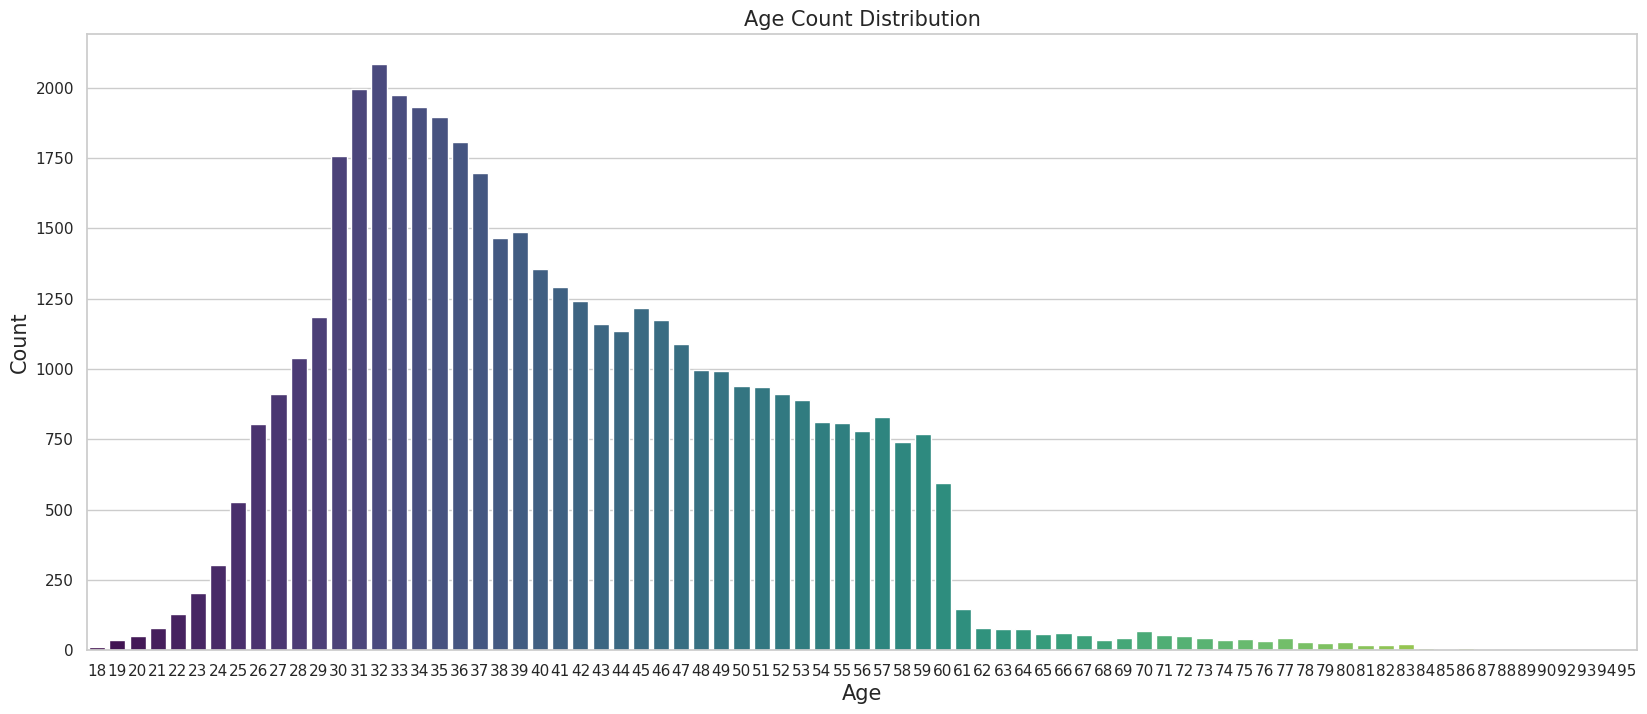

In [49]:
import plotly.express as px

sns.set(style="whitegrid")

plt.figure(figsize=(20, 8))
sns.countplot(x='age', data=df1, palette='viridis')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age Count Distribution', fontsize=15)
plt.show()

In [52]:
import plotly.graph_objs as go
# Box Plot
fig1 = go.Figure()
fig1.add_trace(go.Box(y=df1['age'], name='Age Distribution'))
fig1.update_layout(title='Age Distribution (Box Plot)',
                   xaxis_title='People Age',
                   yaxis_title='Age',
                   font=dict(size=12))
fig1.show()

# Distribution Plot
fig2 = px.histogram(df1, x='age', title='Age Distribution (Distribution Plot)', nbins=20)
fig2.update_xaxes(title_text='Age', tickfont=dict(size=12))
fig2.update_yaxes(title_text='Occurrence', tickfont=dict(size=12))
fig2.update_layout(font=dict(size=12))
fig2.show()

In [54]:
# Quartiles
print('1º Quartile: ', df1['age'].quantile(q = 0.25))
print('2º Quartile: ', df1['age'].quantile(q = 0.50))
print('3º Quartile: ', df1['age'].quantile(q = 0.75))
print('4º Quartile: ', df1['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

print('Ages above: ', df1['age'].quantile(q = 0.75) +
                      1.5*(df1['age'].quantile(q = 0.75) - df1['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0
Ages above:  70.5 are outliers


As we can see that Ages above 70 are outliers

In [55]:
print('Numerber of outliers: ', df1[df1['age'] > 70.5]['age'].count())
print('Number of clients: ', len(df1))
#Outliers in %
print('Outliers are:', round(df1[df1['age'] > 70.5]['age'].count()*100/len(df1),2), '%')

Numerber of outliers:  487
Number of clients:  45211
Outliers are: 1.08 %


In [56]:
# Calculating some values to evaluate this independent variable
print('MEAN:', round(df1['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(df1['age'].std(), 1))
# I think the best way to give a precise insight about dispersion is using the CV (coefficient of variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :', round(df1['age'].std()*100/df1['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.9
STD : 10.6
CV  : 25.9 , High middle dispersion


Conclusion about AGE, in my opinion due to almost high dispersion and just looking at this this graph we cannot conclude if age have a high effect to our variable y, need to keep searching for some pattern. high middle dispersion means we have people with all ages and maybe all of them can subscript a term deposit, or not. The outliers was calculated, so my thinking is fit the model with and without them

# Job: What kind of jobs clients this bank have, if you cross jobs with default, loan or housing, there is no relation

In [59]:
# Calculate the count of each job category
job_counts = df1[['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management',
                  'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician',
                  'job_unemployed', 'job_unknown']].sum()

# Convert the counts into a DataFrame
job_counts_df = pd.DataFrame({'Job': job_counts.index, 'Count': job_counts.values})

fig = px.bar(job_counts_df, x='Job', y='Count', title='Job Count Distribution')
fig.update_xaxes(title_text='Job', tickfont=dict(size=12))
fig.update_yaxes(title_text='Count', tickfont=dict(size=12))
fig.update_layout(title_font=dict(size=20), font=dict(size=12))
fig.show()

# Martial: What kind of 'marital clients' this bank have, if you cross marital with default, loan or housing, there is no relation

In [62]:
# Calculate the count of each marital status category
marital_counts = df1[['marital_divorced', 'marital_married', 'marital_single']].sum()

# Convert the counts into a DataFrame
marital_counts_df = pd.DataFrame({'Marital Status': marital_counts.index, 'Count': marital_counts.values})

# Create a bar plot using Plotly
fig = px.bar(marital_counts_df, x='Marital Status', y='Count', title='Marital Status Count Distribution')
fig.update_xaxes(title_text='Marital Status', tickfont=dict(size=12))
fig.update_yaxes(title_text='Count', tickfont=dict(size=12))
fig.update_layout(title_font=dict(size=20), font=dict(size=12))
fig.show()

# Education: What kind of 'education clients this bank have, if you cross education with default, loan or housing, there is no relation

In [64]:
# Calculate the count of each education category
education_counts = df1[['education_primary', 'education_secondary', 'education_tertiary', 'education_unknown']].sum()

# Convert the counts into a DataFrame
education_counts_df = pd.DataFrame({'Education Level': education_counts.index, 'Count': education_counts.values})

# Create a bar plot using Plotly
fig = px.bar(education_counts_df, x='Education Level', y='Count', title='Education Level Count Distribution')
fig.update_xaxes(title_text='Education Level', tickfont=dict(size=12))
fig.update_yaxes(title_text='Count', tickfont=dict(size=12))
fig.update_layout(title_font=dict(size=20), font=dict(size=12))
fig.show()

# DEFAULT, HOUSING, LOAN

In [66]:
# Counting occurrences for each category in default, housing, and loan variables
default_counts = df1['default'].value_counts()
housing_counts = df1['housing'].value_counts()
loan_counts = df1['loan'].value_counts()

# Create a bar plot for Default
fig1 = go.Figure(go.Bar(
    x=default_counts.index,
    y=default_counts.values,
    text=default_counts.values,
    textposition='auto',
    marker=dict(color='blue')
))
fig1.update_layout(title='Default Count Distribution',
                   xaxis_title='Default',
                   yaxis_title='Count',
                   font=dict(size=12))
fig1.show()

# Create a bar plot for Housing
fig2 = go.Figure(go.Bar(
    x=housing_counts.index,
    y=housing_counts.values,
    text=housing_counts.values,
    textposition='auto',
    marker=dict(color='green')
))
fig2.update_layout(title='Housing Count Distribution',
                   xaxis_title='Housing',
                   yaxis_title='Count',
                   font=dict(size=12))
fig2.show()

# Create a bar plot for Loan
fig3 = go.Figure(go.Bar(
    x=loan_counts.index,
    y=loan_counts.values,
    text=loan_counts.values,
    textposition='auto',
    marker=dict(color='orange')
))
fig3.update_layout(title='Loan Count Distribution',
                   xaxis_title='Loan',
                   yaxis_title='Count',
                   font=dict(size=12))
fig3.show()


# BANK CLIENTS CONCLUSION


The ages dont mean to much, has a medium dispersion and dont make sense relate with other variables will not tell any insight

Jobs, Marital and Education i think the best analisys is just the count of each variable, if we related with the other ones its is not conclusive, all this kind of variables has yes, unknown and no for loan, default and housing.

Default, loan and housing, its just to see the distribution of people.

## Model Building

In [75]:
# Dividing our data into input and output variables
x=pd.concat([df1.iloc[:,0:11],df1.iloc[:,12:]],axis=1)
y=df1.iloc[:,11]

In [76]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

## Model Predictions

In [77]:
# Predict for x dataset
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [78]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


## Testing Model Accuracy

In [79]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[39032,   890],
       [ 3979,  1310]])

In [80]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
(39107+1282)/(39107+815+4007+1282)

0.8933445400455642

Accuracy: 89.3%

In [81]:
# As accuracy = 0.8933, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0
classifier.predict_proba(x)[:,1]

array([0.05129922, 0.0323888 , 0.02551381, ..., 0.73333881, 0.0773174 ,
       0.54630385])

ROC Curve plotting and finding AUC value

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])
auc = roc_auc_score(y, y_pred)

# Create a ROC curve plot using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', line=dict(color='red'), name='ROC Curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(color='black', dash='dash'), name='Random Guess'))

fig.update_layout(title='ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate',
                  font=dict(size=12),
                  showlegend=True)
fig.show()

print('AUC Accuracy:', auc)

AUC Accuracy: 0.6126951999583155


In conclusion, while the logistic regression model demonstrates a reasonable level of accuracy in predicting outcomes, the modest AUC value suggests that there is room for improvement.